In [8]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import to_graph
from hypernetworks.utils.HTSpaces import get_space
from hypernetworks.utils.HTSearch import what_is_it

In [9]:
from IPython.display import Image, display

In [10]:
parser = load_parser()

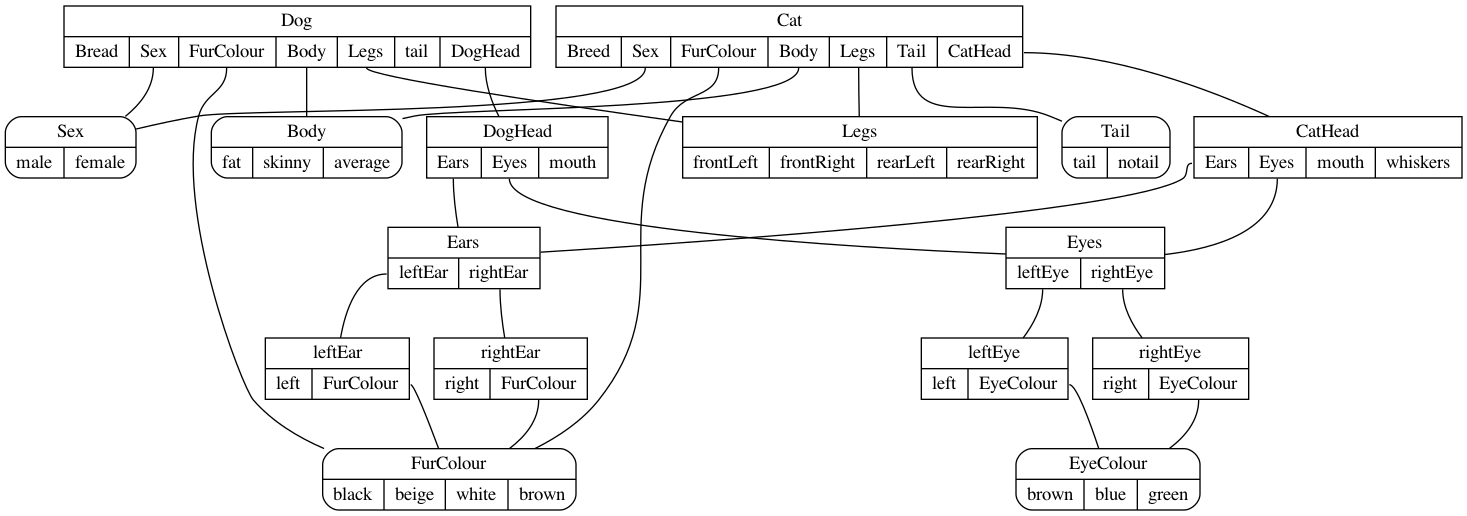

In [11]:
cat_hn = Hypernetwork()

compile_hn(cat_hn, parser, """
    FurColour={~black, ~beige, ~white, ~brown}
    EyeColour={~brown, ~blue, ~green}
    Body={~fat, ~skinny, ~average}
    CatHead=<Ears, Eyes, ~mouth, ~whiskers>
    DogHead=<Ears, Eyes, ~mouth>
    Ears=<leftEar=<~left, FurColour>, rightEar=<~right, FurColour>>
    Eyes=<leftEye=<~left, EyeColour>, rightEye=<~right, EyeColour>>
    Cat=<~Breed, Sex, FurColour, Body, Legs, Tail={~tail, ~notail}, CatHead>
    Legs=<~frontLeft, ~frontRight, ~rearLeft, ~rearRight>
    tail=<~length>
    Sex={~male, ~female}
    Dog=<~Bread, Sex, FurColour, Body, Legs, ~tail, DogHead>
""")

to_graph(cat_hn, fname="/tmp/cat", view=False)
Image(filename='/tmp/cat.png', width=1200, height=1200)

rightEye=<~right, EyeColour>
Cat=<~Breed, Sex, FurColour, Body, Legs, Tail, CatHead>
CatHead=<Ears, Eyes, ~mouth, ~whiskers>
Eyes=<leftEye, rightEye>



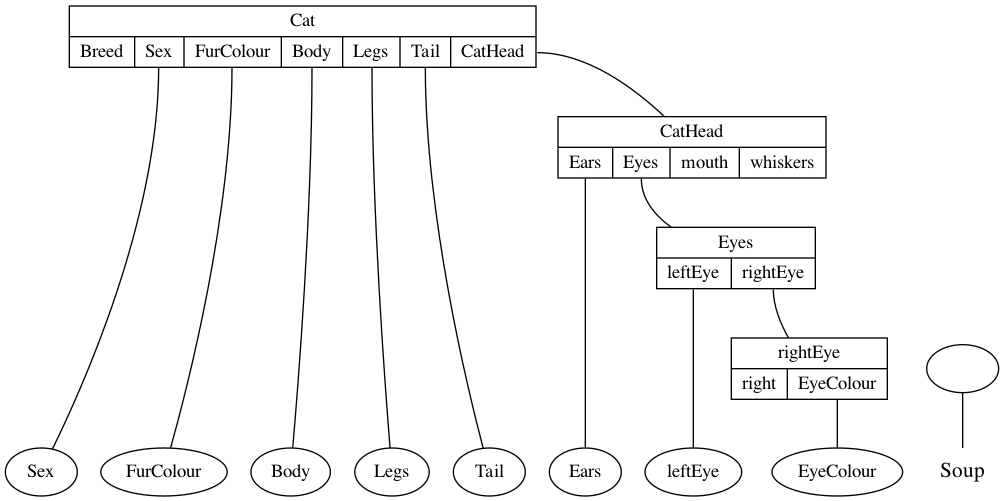

In [12]:
find = get_space(cat_hn, True, False, "Cat", "rightEye")

if find:
    print(find)

to_graph(find, fname="/tmp/cat2", view=False)
Image(filename='/tmp/cat2.png', width=700, height=500)

In [13]:
isA = what_is_it(cat_hn, True, "whiskers", "brown")
print(isA)

['Cat', 'CatHead']
